## 0. Описание задачи
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.


Описание датасета
Посмотрим на переменные, которые содержит датасет:

school — аббревиатура школы, в которой учится ученик
sex — пол ученика ('F' - женский, 'M' - мужской)
age — возраст ученика (от 15 до 22)
address — тип адреса ученика ('U' - городской, 'R' - за городом)
famsize — размер семьи('LE3' <= 3, 'GT3' >3)
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
schoolsup — дополнительная образовательная поддержка (yes или no)
famsup — семейная образовательная поддержка (yes или no)
paid — дополнительные платные занятия по математике (yes или no)
activities — дополнительные внеучебные занятия (yes или no)
nursery — посещал детский сад (yes или no)
higher — хочет получить высшее образование (yes или no)
internet — наличие интернета дома (yes или no)
romantic — в романтических отношениях (yes или no)
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
absences — количество пропущенных занятий
score — баллы по госэкзамену по математике

## 1.Первичная обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
stud #знакомимся с датасетом

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Загрузились 30 столбцов, а в описании 29, в описании нет столбца "studytime, granular". Всего 395 записей.
К количественным признакам можно отнести следующие параметры: age, absences и score. 
Остальные характеристики отнесем к категориальным: 
-Бинарных (два значения) - 12: sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic 
-Оценочные (несколько значений) - 14: school, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health 
-Остальные 1: school, studytime_granular

Столбец "studytime, granular" вероятно взаимосвязан с "studytime". Рассчитаем коэффициент коррелиции:

In [8]:
stud['studytime'].corr(stud['studytime, granular'])

-0.9999999999999991

Практически 100% обратная корреляция между столбцами studytime и studytime, granular. Удалим данный столбец из датасета:

In [9]:
stud.drop(['studytime, granular'], inplace = True, axis = 1)

Рассмотрим распределение в категориальных столбцах:

In [10]:
for i in stud.columns:
    if i!="age" and i!="absences" and i!="score":
        display(pd.DataFrame(stud[i].value_counts()))
        count_nan = len(stud) - stud[i].count()
        print("Кол-во пустых значений в столбце:", count_nan)

,school
GP,349
MS,46


Кол-во пустых значений в столбце: 0


,sex
F,208
M,187


Кол-во пустых значений в столбце: 0


,address
U,295
R,83


Кол-во пустых значений в столбце: 17


,famsize
GT3,261
LE3,107


Кол-во пустых значений в столбце: 27


,Pstatus
T,314
A,36


Кол-во пустых значений в столбце: 45


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Кол-во пустых значений в столбце: 3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Кол-во пустых значений в столбце: 24


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Кол-во пустых значений в столбце: 19


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Кол-во пустых значений в столбце: 36


,reason
course,137
home,104
reputation,103
other,34


Кол-во пустых значений в столбце: 17


,guardian
mother,250
father,86
other,28


Кол-во пустых значений в столбце: 31


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Кол-во пустых значений в столбце: 28


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Кол-во пустых значений в столбце: 7


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Кол-во пустых значений в столбце: 22


,schoolsup
no,335
yes,51


Кол-во пустых значений в столбце: 9


,famsup
yes,219
no,137


Кол-во пустых значений в столбце: 39


,paid
no,200
yes,155


Кол-во пустых значений в столбце: 40


,activities
yes,195
no,186


Кол-во пустых значений в столбце: 14


,nursery
yes,300
no,79


Кол-во пустых значений в столбце: 16


,higher
yes,356
no,19


Кол-во пустых значений в столбце: 20


,internet
yes,305
no,56


Кол-во пустых значений в столбце: 34


,romantic
no,240
yes,124


Кол-во пустых значений в столбце: 31


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Кол-во пустых значений в столбце: 27


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Кол-во пустых значений в столбце: 11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Кол-во пустых значений в столбце: 8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Кол-во пустых значений в столбце: 15


В столбце "Fedu" есть значение, которое не соотвествуют описанию датасета - "40". В столбце "famrel" значение "-1" не соответствует описанию. Также значения в столбце "failures" не соответсвуют описанию.

In [11]:
stud.loc[stud['Fedu'] == 40.0, 'Fedu'] = 4.0
# Вероятно, значение 40 является опечаткой, скорее всего это значение 4.

In [12]:
stud.loc[stud['famrel'] == -1.0, 'famrel'] = 1.0
# Вероятно, значение -1 является опечаткой, скорее всего это значение 1.

In [17]:
stud.loc[stud['failures'] == 3.0, 'failures'] = 4.0
stud.loc[stud['failures'] == 2.0, 'failures'] = 3.0
stud.loc[stud['failures'] == 1.0, 'failures'] = 2.0
stud.loc[stud['failures'] == 0.0, 'failures'] = 1.0
# приведем их в соотвествие с описанием

Исследуем столбец age

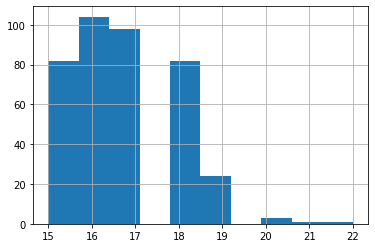

In [19]:
stud.age.hist()

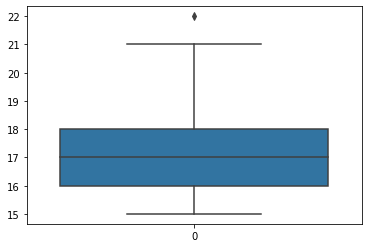

In [20]:
sns.boxplot(data=stud.age)

График показывает, что значние 22 является выбросом, но согласно описанию датасета этот возраст является допустимым значением выборки. Оставим это значение в датасете

In [22]:
display(pd.DataFrame(stud.groupby(['age']).score.agg(['count','mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


На основе выведенной таблицы можно сделать предположение, что чем младше студент,тем выше оценка, за исключеничем студентов возраста 20 лет, но т.к. кол-во студентов в этой группе небольшое, то статистически это не показательно

Исследуем столбец absences — количество пропущенных занятий

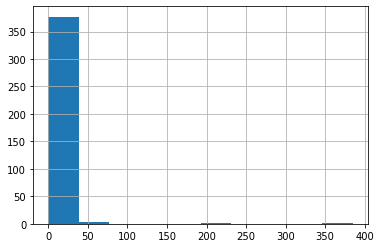

In [23]:
stud.absences.hist()

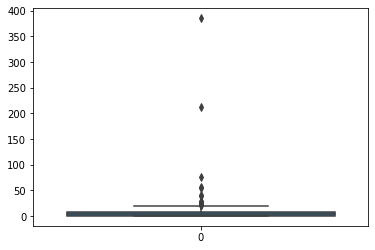

In [24]:
sns.boxplot(data=stud.absences)

На графике видим достаточно большое количество выбросов

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


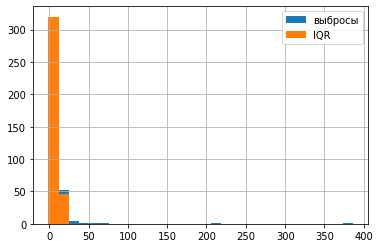

In [28]:
# сделаем подровный анализ границ и расчитаем их точные значения
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud.absences.loc[stud.absences <= 385].hist(bins = 30, 
                                  range = (-1, 386), 
                                  
                                  label = 'выбросы')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (-1, 386),
                                                                        
                                                                        label = 'IQR')

plt.legend();

Но стоит ли отбросить строки с выбросами? Я думаю нет, т.к. это не является каким-то недостижимым показателем.

In [31]:
len(stud) - stud.absences.count()

12

12 строк с незаполненными данными. Давайте исследуем эти строки 

In [32]:
stud[stud.absences.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,1.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,1.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,1.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,4.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,1.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,1.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,1.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,1.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,1.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


есть предположение о том, что кол-во пропусков может быть следствием показателя famrel (семейные отношения), возможно ребенок отсутсвует на занятиях из-за негативной семейной обставноки, но показатели достаточно высокие данного параметра. 

Посмотрим на числовое распределение score 

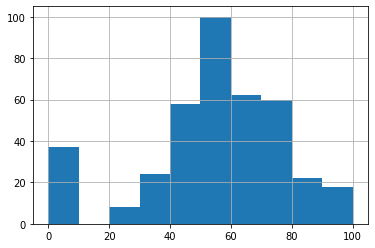

In [34]:
stud.score.hist()

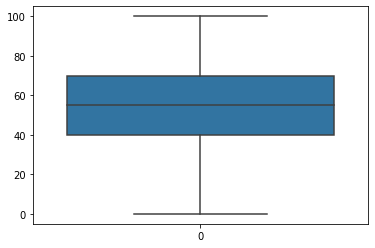

In [35]:
sns.boxplot(data=stud.score)

Значения представлены в рамках, описанных в датасете

In [36]:
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Проведем корреляционный анализ

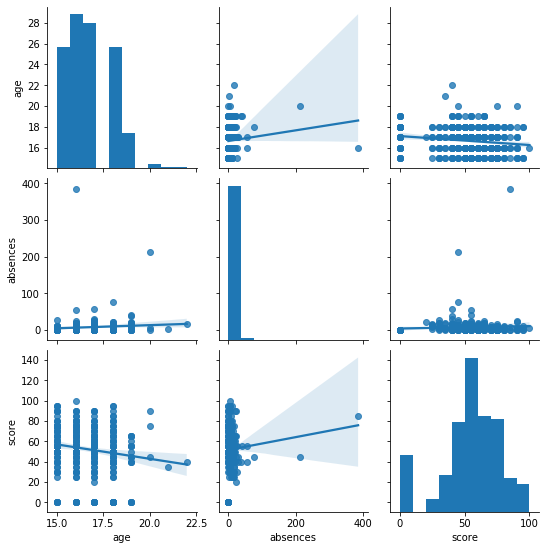

In [39]:
sns.pairplot(stud, vars=['age', 'absences', 'score'], kind = 'reg')

In [40]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.083064,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.016222,-0.070460


age и score, absences и score слабо скоррелированы
Сильно коррелируют образование матери и образование отца
Чем старше ученик,тем хуже результат (отрицательная корреляция между столбцами), ранее мы уже отмечали эту зависимость
Чем больше прогулов,тем хуже результат (аналогично, отрицательная корреляция)

Категориальные признаки

In [47]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 
                   'schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']

In [48]:
for elem in list_of_binary_columns:
    a = stud[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0],a[1]])
    else:
        print(f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [51]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 3))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

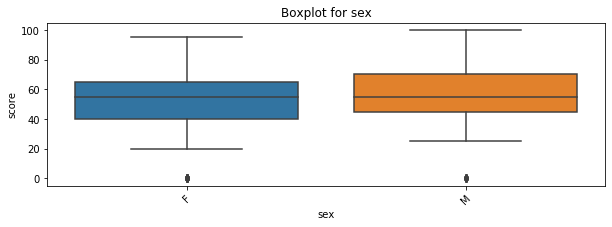

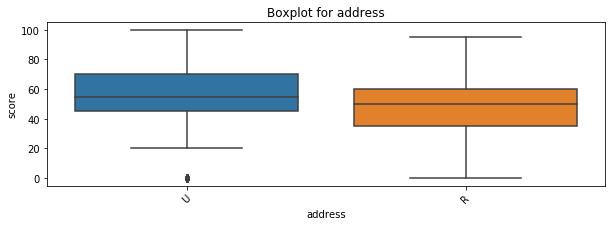

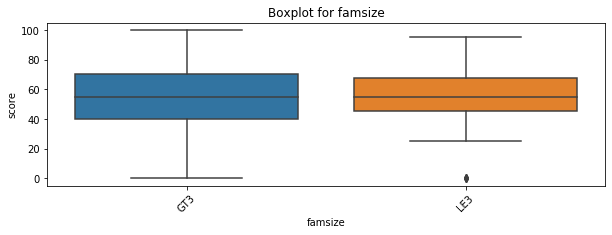

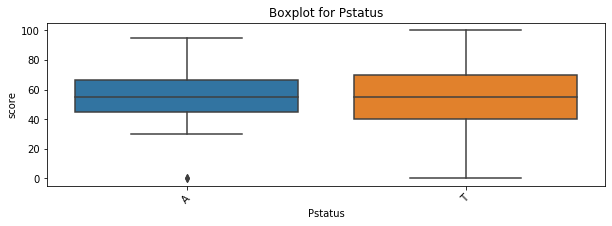

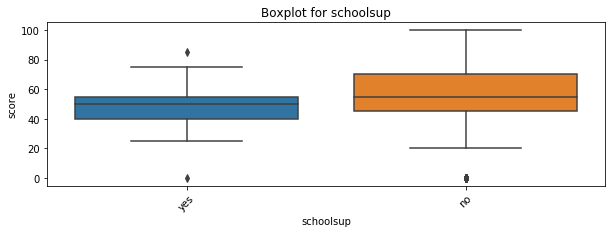

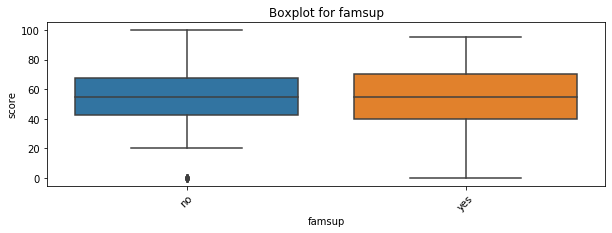

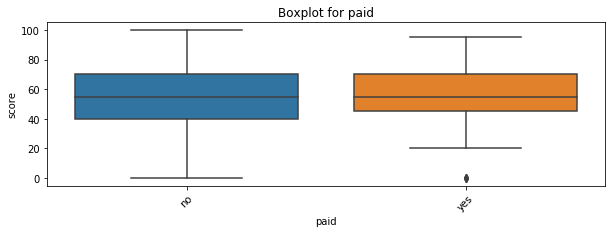

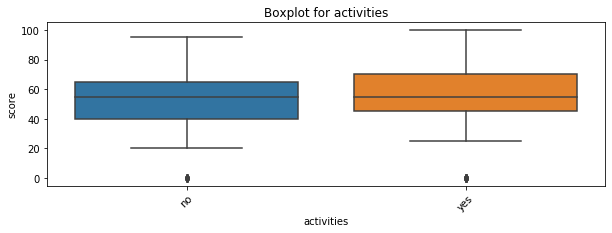

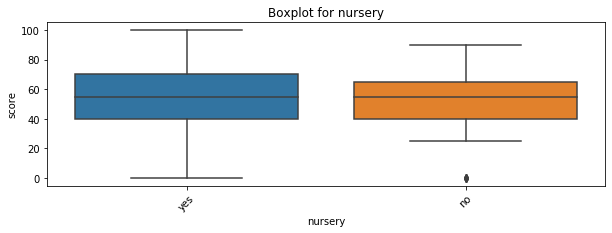

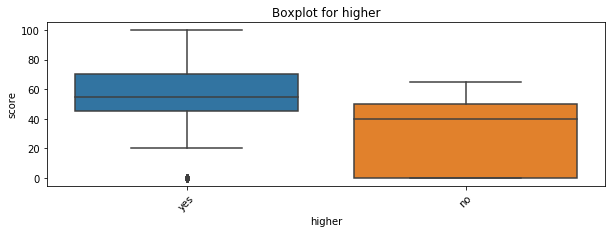

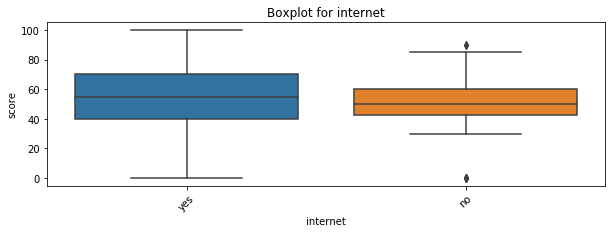

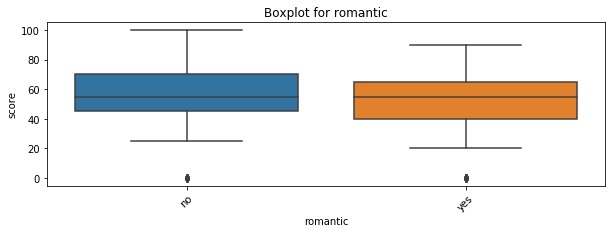

In [52]:
for col in list_of_binary_columns:
    get_boxplot(col)

Самое сильное влияние на оценку оказывает желаение ребенка получать далее высшее образование.
"Городские" ребята учатся лучше

In [57]:
list_of_binary_columns.append('school')
list_of_rating_columns = ('Medu', 'Fedu', 'Mjob', 'Mjob',
                            'reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'famrel', 'freetime', 'goout', 'health')
list_of_all_columns=[]
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

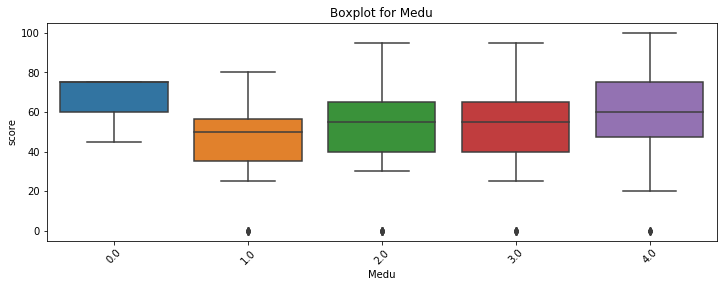

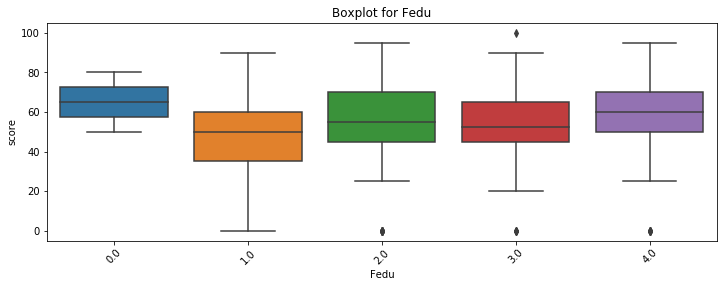

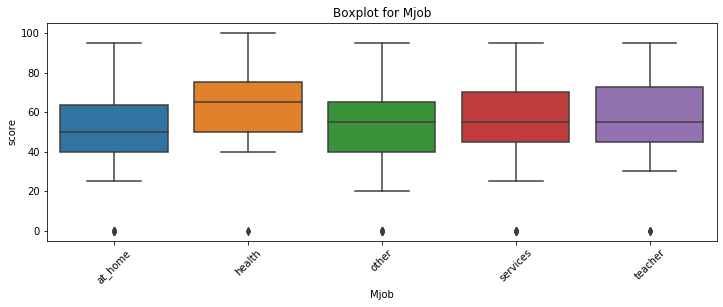

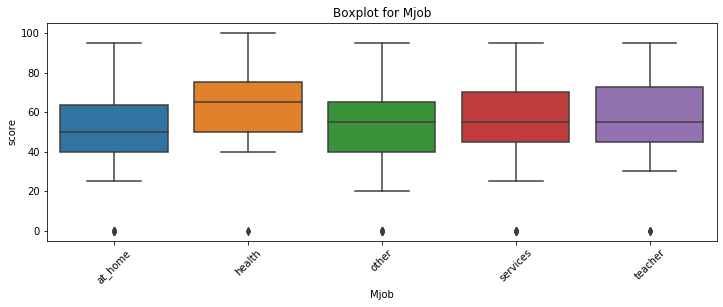

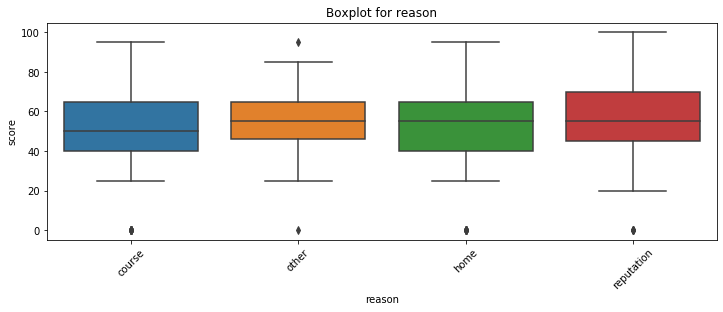

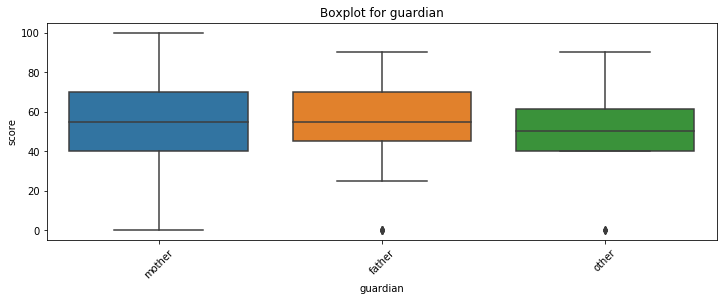

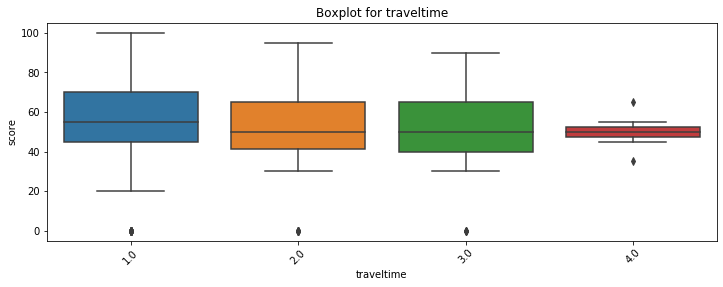

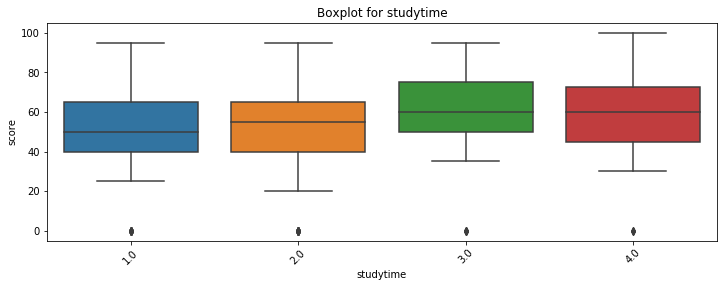

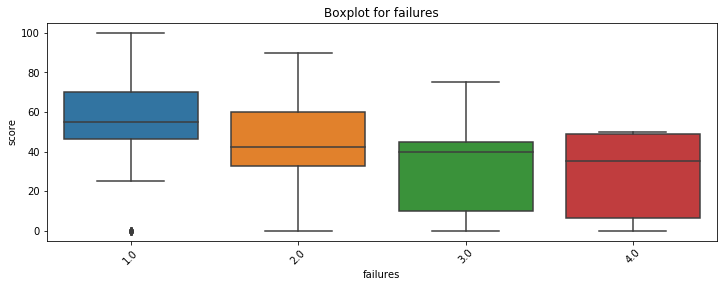

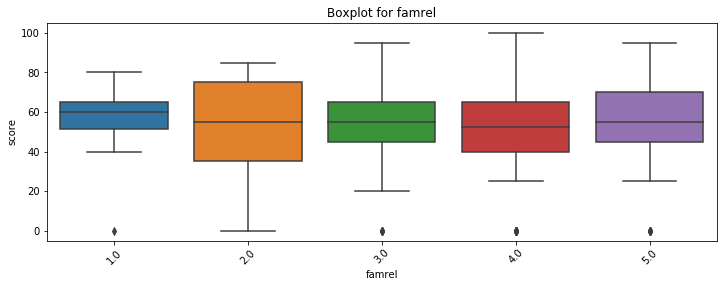

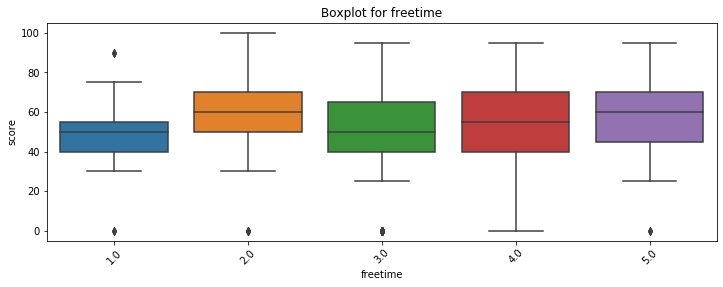

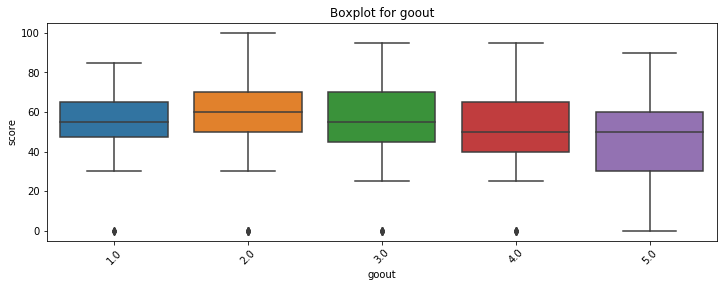

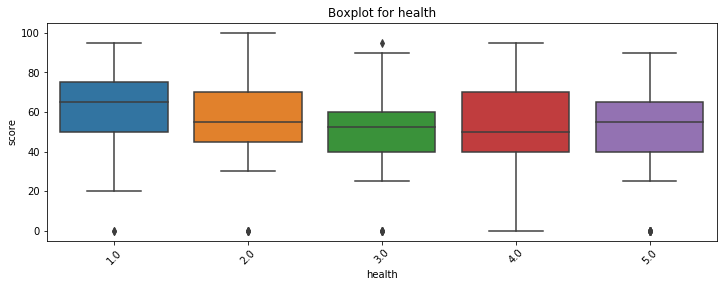

In [58]:
for col in list_of_rating_columns:
    get_boxplot(col)

Большее кол-во времени, проведенное с друзьями оказывает отрицательное влияение на оценку


Выводы
В данных небольшое кол-во пустых значений, больше всего пробелов в столбцах (Pstatus, Fjob , paid). Заполнить пропуски не представляется возможным на текущем уровне
Столбец "studytime, granular" полностью копировал столбец "studytime", был удален.
Гипотезы:
- Положительная корреляция есть только относительно возраста учеников. С возрастом дети учатся хуже.
- Отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score.
- Большее кол-во времени, проведенное с друзьями оказывает отрицательное влияение на оценку
- Если ребенок желает далее получать высшее образование, то и его оценки будут выше 